In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os, pickle

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 10})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 10})

plt.rcParams['axes.axisbelow'] = True

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from utils.latticeeasy import LATTICEEASY

In [167]:
output_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/test1/smash_peak+0_peak+0_0.01c_v1"

In [168]:
data = LATTICEEASY(output_dir)

In [169]:
x, y = (np.linspace(0,data.domain_width_pr[0],data.domain_dimensions[0]),)*2

In [170]:
times, slices = pickle.load(open(os.path.join(output_dir,"Edens slices.p"), "rb"))

In [171]:
vmin = 0
# vmax = max([s.max() for s in slices])
vmax = 20

title = fr"$\alpha=${data.alpha}, $\beta=${data.beta}" + "\n" + "No initial phase differemce\n"#
# r"1 $t_{\textrm{pr}}$"+" phase difference.\n"#"Initially opposite phases\n"#

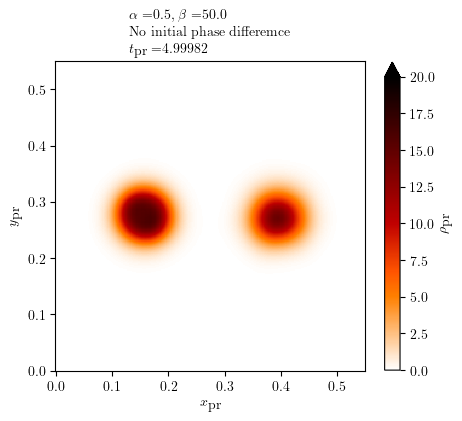

In [172]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.set_aspect('equal')
ax.set_xlabel(r"$x_{\textrm{pr}}$")
ax.set_ylabel(r"$y_{\textrm{pr}}$")
fig.suptitle(fr"")
ax.set_title(title + r"$t_{\textrm{pr}}=$" + f"{times[0]}")

mesh = ax.pcolormesh(x, y, slices[0].T, vmin=vmin, vmax=vmax)
fig.colorbar(mesh, shrink=.8, label=r"$\rho_{\textrm{pr}}$", extend='max')

In [173]:
def animate_slices(i):
    ax.pcolormesh(x, y, slices[i].T, vmin=vmin, vmax=vmax)
    ax.set_title(title + r"$t_{\textrm{pr}}=$" + f"{times[i]}")

In [174]:
ani = FuncAnimation(fig, animate_slices, frames=len(slices), interval=100)
ani.save(os.path.join(output_dir,"Edens animation.mp4"),dpi=150)